In [40]:
import pandas as pd
import numpy as np

In [154]:
#import the dataset
path = "./datasets/P2_mov.csv"
df = pd.read_csv(path)
df['profit'] = df['revenue']-df['budget']

In [155]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
profit                     0
dtype: int64

In [156]:
import os
os.stat(path)

os.stat_result(st_mode=33206, st_ino=1970324837013592, st_dev=2288759156, st_nlink=1, st_uid=0, st_gid=0, st_size=5698602, st_atime=1603270104, st_mtime=1603270104, st_ctime=1571231928)

In [158]:
# data inspection
print("list of columns: ",df.columns)
print("number of rows: ",len(df))

list of columns:  Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'profit'],
      dtype='object')
number of rows:  4803


In [159]:
# Data Reduction: choosing required columns:
colms = ['budget','genres','original_language','title','overview','release_date','runtime','status','vote_average','profit']
df = df[colms]

In [161]:
df.describe()

,budget,runtime,vote_average,profit
count,4.803000e+03,4801.000000,4803.000000,4.803000e+03
mean,2.904504e+07,106.875859,6.092172,5.321560e+07
std,4.072239e+07,22.611935,1.194612,1.359677e+08
min,0.000000e+00,0.000000,0.000000,-1.657101e+08
25%,7.900000e+05,94.000000,5.600000,-7.995375e+05
50%,1.500000e+07,103.000000,6.200000,2.511317e+06
75%,4.000000e+07,118.000000,6.800000,5.531286e+07
max,3.800000e+08,338.000000,10.000000,2.550965e+09


# Data Cleaning:- handling missing data:
1. runtime has 2 missing values
2. overview has 3 missing values
3. release date has one missing value


In [162]:
df.isnull().sum()

budget               0
genres               0
original_language    0
title                0
overview             3
release_date         1
runtime              2
status               0
vote_average         0
profit               0
dtype: int64

In [163]:
# run time missing values
df[pd.isnull(df["runtime"])]

,budget,genres,original_language,title,overview,release_date,runtime,status,vote_average,profit
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",it,Chiamatemi Francesco - Il Papa della gente,NaN,2015-12-03,NaN,Released,7.3,-15000000
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",en,"To Be Frank, Sinatra at 100",NaN,2015-12-12,NaN,Released,0.0,-2


In [164]:
# filled missing value with mean
df["runtime"] = df["runtime"].fillna(df["runtime"].mean())

In [166]:
# no more missing values in runtime
df[pd.isnull(df["runtime"])]

,budget,genres,original_language,title,overview,release_date,runtime,status,vote_average,profit


In [168]:
#overview and release_date have 3 and 1 missing values respectively, lets fill them with NaN
df["overview"] = df["overview"].fillna('NaN')
df["release_date"] = df["release_date"].fillna('NaN')

#check if any other missing values present
df.isnull().sum()

budget               0
genres               0
original_language    0
title                0
overview             0
release_date         0
runtime              0
status               0
vote_average         0
profit               0
dtype: int64

In [169]:
#binning vote_average by adding a new column called Status
df['status'] = np.where(df['vote_average']>=6,'HIT','FLOP')

In [171]:
#normalizing budget (absolute maximum scaling)
df["revenue_scaled"] = df['budget']/df['budget'].abs().max()

In [173]:
df.drop(['budget'], axis=1, inplace=True)
df.head()

,genres,original_language,title,overview,release_date,runtime,status,vote_average,profit,revenue_scaled
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",2009-12-10,162.0,HIT,7.2,2550965087,0.623684
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",2007-05-19,169.0,HIT,6.9,661000000,0.789474
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Spectre,A cryptic message from Bond’s past sends him o...,2015-10-26,148.0,HIT,6.3,635674609,0.644737
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,2012-07-16,165.0,HIT,7.6,834939099,0.657895
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,John Carter,"John Carter is a war-weary, former military ca...",2012-03-07,132.0,HIT,6.1,24139100,0.684211


In [174]:
import matplotlib.pyplot as plt
import seaborn as sn
corr = df.corr()
print(corr)

                 runtime  vote_average    profit  revenue_scaled
runtime         1.000000      0.373989  0.219919        0.269834
vote_average    0.373989      1.000000  0.208241        0.093146
profit          0.219919      0.208241  1.000000        0.575852
revenue_scaled  0.269834      0.093146  0.575852        1.000000


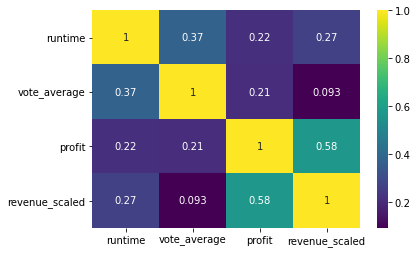

In [175]:
sn.heatmap(corr, annot=True,cmap='viridis')
plt.show()

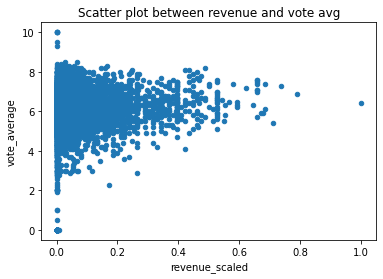

In [181]:
#scatter plot 1 
import matplotlib.pyplot as plot


df.plot.scatter(x='revenue_scaled', y='vote_average', title= "Scatter plot between revenue and vote avg");

plot.show(block=True);

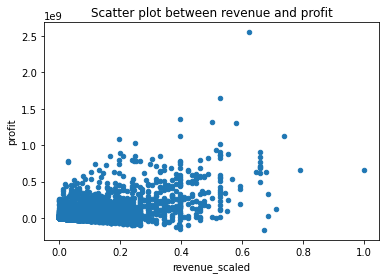

In [182]:
#scatter plot 2
import matplotlib.pyplot as plot


df.plot.scatter(x='revenue_scaled', y='profit', title= "Scatter plot between revenue and profit");

plot.show(block=True);